# Running Code

In [2]:
%pylab inline
import matplotlib
from matplotlib.font_manager import FontProperties
from matplotlib import rc
rc('text', usetex=True)
plt.rcParams["patch.force_edgecolor"] = True

Populating the interactive namespace from numpy and matplotlib


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['rc']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FixedLocator
font0 = FontProperties()
font = font0.copy()
font.set_size(36)
font.set_family('serif')
labelfont=font0.copy()
labelfont.set_size(26)
labelfont.set_weight('bold')

In [4]:
#Distributions were generated by running the example Gen_HNLEvts.py and Gen_HPSEvts.py files

D100MeV = np.load("./PassCuts_100MeV_HNL_Truth.npy")
D100MeVS = np.load("./PassCuts_100MeV_HNL_Reco.npy")
S100MeV = np.load("./PassCuts_100MeV_HPS_Truth.npy")
S100MeVS = np.load("./PassCuts_100MeV_HPS_Reco.npy")
S80MeV = np.load("./PassCuts_80MeV_HPS_Truth.npy")
S80MeVS = np.load("./PassCuts_80MeV_HPS_Reco.npy")

In [5]:
print([len(D100MeV), len(S100MeV), len(S80MeV)])
print([len(D100MeVS), len(S100MeVS), len(S80MeVS)])

[375468, 99920, 97247]
[375469, 99919, 97247]


Text(10, -10, '$\\mathrm{Reco.}$')

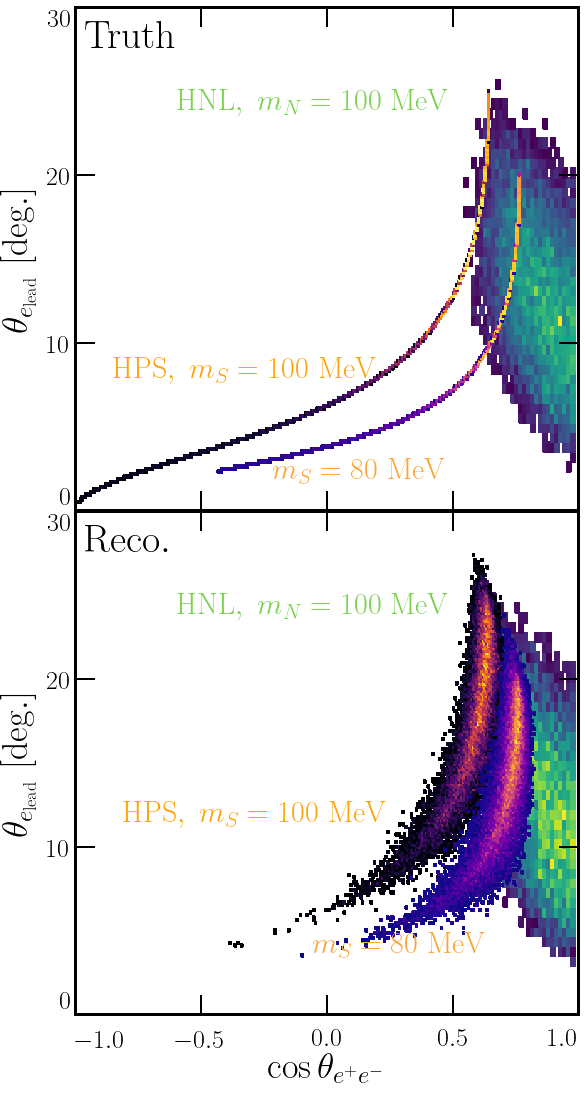

In [6]:
figwid = 7.0
fighei = 7.0
lside = 1.1
rside = 0.1
wwspace = 1.5
bot = 0.9
top = 0.1
hhspace = 0.0

ncol, nrow = 1, 2
wid = lside + ncol*figwid + (ncol-1)*wwspace + rside
hei = bot + nrow*fighei + (nrow-1)*hhspace + top

lfactor = lside/wid
rfactor = rside/wid
bfactor = bot/hei
tfactor = top/hei
wfactor = wwspace/figwid
hfactor = hhspace/fighei

matplotlib.rcParams['axes.linewidth'] = 2.0
fig, axes = plt.subplots(nrow, ncol, figsize=(wid, hei), facecolor='1.0');
fig.subplots_adjust(left = lfactor, bottom=bfactor, right=(1.0-rfactor), top=(1.0-tfactor), wspace=wfactor, hspace=hfactor);

xmin = -1
xmax = 1
ymin = 0
ymax = 30
for ax in axes:
    ax.axis([xmin, xmax, ymin, ymax])
    ax.plot([xmin, xmin, xmax, xmax, xmin], [ymin, ymax, ymax, ymin, ymin], ls='-', color='k', lw=4, zorder=30)

    ax.set_xlabel(r'$\cos\theta_{e^+e^-}$', fontproperties=font)        
    ax.set_ylabel(r'$\theta_{e_{\rm lead}}\ [\mathrm{deg.}]$', fontproperties=font)

    ax.xaxis.set_major_locator(FixedLocator((-1, -0.5 ,0, 0.5, 1)))
    ax.yaxis.set_major_locator(FixedLocator((0, 10, 20, 30)))

    ax.tick_params(direction='in', reset=True, which='both', zorder=30, length=20, width=2)
    ax.tick_params(direction='in', which='minor', zorder=30, length=10, width=1)
    [l.set_position((0.5, -0.015)) for l in ax.get_xticklabels()]
    [l.set_size(labelfont.get_size()) for l in ax.get_xticklabels()]
    [l.set_size(labelfont.get_size()) for l in ax.get_yticklabels()]

    ic = 0
    for l in ax.get_yticklabels():
        if ic == 0:
            l.set_va("bottom")
        elif ic == len(ax.get_yticklabels())-1:
            l.set_va("top")
        ic += 1

    ic = 0
    for l in ax.get_xticklabels():
        if ic == 0:
            l.set_ha("left")
        elif ic == len(ax.get_xticklabels())-1:
            l.set_ha("right")
        ic += 1

axes[0].set_xlabel('')
axes[0].set_xticklabels((""))
        
axes[0].hist2d(D100MeV.T[2], np.arctan(D100MeV.T[3])*180.0/np.pi, bins=([0.2 + (np.max(D100MeV.T[2])-0.2)/50*j for j in range(51)],[0 + 35/60*j for j in range(61)]), weights=D100MeV.T[4], cmin=2e-9, edgecolors='face')
axes[0].hist2d(S100MeV.T[2], np.arctan(S100MeV.T[3])*180.0/np.pi, bins=([-1.0 + 2.0/300*j for j in range(301)],[0 + 45/300*j for j in range(301)]), cmin=1e-5, cmap='inferno', edgecolors='face')
axes[0].hist2d(S80MeV.T[2], np.arctan(S80MeV.T[3])*180.0/np.pi, bins=([-1.0 + 2.0/300*j for j in range(301)],[0 + 45/300*j for j in range(301)]), cmin=1e-5, cmap='plasma', edgecolors='face')

axes[1].hist2d(D100MeVS.T[2], np.arctan(D100MeVS.T[3])*180.0/np.pi, bins=([0.2 + (np.max(D100MeVS.T[2])-0.2)/50*j for j in range(51)],[0 + 35/60*j for j in range(61)]), weights=D100MeVS.T[4], cmin=2e-9, edgecolors='face')
axes[1].hist2d(S100MeVS.T[2], np.arctan(S100MeVS.T[3])*180.0/np.pi, bins=([-1.0 + 2.0/300*j for j in range(301)],[0 + 45/300*j for j in range(301)]), cmin=10, cmap='inferno', edgecolors='face')
axes[1].hist2d(S80MeVS.T[2], np.arctan(S80MeVS.T[3])*180.0/np.pi, bins=([-1.0 + 2.0/300*j for j in range(301)],[0 + 45/300*j for j in range(301)]), cmin=10, cmap='plasma', edgecolors='face')

for ax in axes:
    ax.set_xlim([xmin,xmax])
    ax.set_ylim([ymin,ymax])


axes[0].annotate(r"$\mathrm{HPS},\ m_S = 100\ \mathrm{MeV}$", xy=(0.2, 7), xytext=(0,5), textcoords="offset points", ha="right", va="bottom", size=30, color=(mpl.cm.get_cmap('inferno'))(0.8))
axes[0].annotate(r"$m_S = 80\ \mathrm{MeV}$", xy=(0, 2), xytext=(-55,17), textcoords="offset points", ha="left", va="top", size=30, color=(mpl.cm.get_cmap('plasma'))(0.8))
axes[0].annotate(r"$\mathrm{HNL},\ m_N = 100\ \mathrm{MeV}$", xy=(0.4, 25), xytext=(22,0), textcoords="offset points", ha="right", va="top", size=30, color=(mpl.cm.get_cmap('viridis'))(0.8))    

axes[1].annotate(r"$\mathrm{HPS},\ m_S = 100\ \mathrm{MeV}$", xy=(0.2, 7), xytext=(10,65), textcoords="offset points", ha="right", va="bottom", size=30, color=(mpl.cm.get_cmap('inferno'))(0.8))
axes[1].annotate(r"$m_S = 80\ \mathrm{MeV}$", xy=(0, 2), xytext=(-15,47), textcoords="offset points", ha="left", va="top", size=30, color=(mpl.cm.get_cmap('plasma'))(0.8))
axes[1].annotate(r"$\mathrm{HNL},\ m_N = 100\ \mathrm{MeV}$", xy=(0.4, 25), xytext=(22,0), textcoords="offset points", ha="right", va="top", size=30, color=(mpl.cm.get_cmap('viridis'))(0.8))    

axes[0].annotate(r"$\mathrm{Truth}$", xy=(xmin, ymax), xytext=(10,-10), textcoords="offset points", ha="left", va="top", size=40, color='k')
axes[1].annotate(r"$\mathrm{Reco.}$", xy=(xmin, ymax), xytext=(10,-10), textcoords="offset points", ha="left", va="top", size=40, color='k')


In [64]:
fig.savefig("HNL_HPS_Dists_TruthReco.pdf")